In [1]:
import numpy as np 
import pandas as pd 
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS

plt.rc('figure',figsize=(17,13))
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data=pd.read_csv('dataset.csv')
data

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,1344800580741574656,нσℓℓүαηη,"From MI,VT,FL",#Wife👫#booknerd 📚#HospitalPharmacyVeteran🏩🤍#Mi...,2015-12-30 22:35:57,768,2945,14014,False,2021-01-01 00:20:18,#HappyNewYearsEve received my #first #dose of ...,"['HappyNewYearsEve', 'first', 'dose', 'PfizerB...",Twitter for iPad,0,1,False
2650,1344781844839972867,Free Malaysia Today,Malaysia,Free and Independent #FMTNews Telegram: https:...,2010-01-05 16:17:15,166605,1,0,False,2020-12-31 23:05:51,This opens the way for regulators worldwide to...,"['FMTNews', 'WHO', 'Vaccine']",Twitter Web App,0,0,False
2651,1344781623749959682,Monica #WashYourHands,"Dublin City, Ireland",Nurse 💉 MBA student 📙 Mediocre wine aficionado...,2018-05-11 09:33:52,88,607,1441,False,2020-12-31 23:04:58,First dose of #PfizerBioNTech vaccine received...,"['PfizerBioNTech', 'CovidVaccine']",Twitter for iPhone,0,1,False
2652,1344779534030274561,UMaravia,Lancaster University,"Doctoral research: organ transplantation, vacc...",2017-09-29 20:14:11,76,180,1091,False,2020-12-31 22:56:40,💉✅⛔️To vax or not to vax?\n☪️Check out my late...,NaN,Twitter Web App,2,7,False


# **TEXT PREPROCESSING UNTUK ANALISIS SENTIMEN VADER**

In [4]:
def clean(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    return text

data['text'] = data['text'].apply(lambda x:clean(x))
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
scores=[]
for i in range(len(data['text'])):
    
    score = analyser.polarity_scores(data['text'][i])
    score=score['compound']
    scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=(-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data['sentiment']=pd.Series(np.array(sentiment))

In [5]:
data

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,Positive
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,Negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,Positive
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,Neutral
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,1344800580741574656,нσℓℓүαηη,"From MI,VT,FL",#Wife👫#booknerd 📚#HospitalPharmacyVeteran🏩🤍#Mi...,2015-12-30 22:35:57,768,2945,14014,False,2021-01-01 00:20:18,#HappyNewYearsEve received my #first #dose of ...,"['HappyNewYearsEve', 'first', 'dose', 'PfizerB...",Twitter for iPad,0,1,False,Positive
2650,1344781844839972867,Free Malaysia Today,Malaysia,Free and Independent #FMTNews Telegram: https:...,2010-01-05 16:17:15,166605,1,0,False,2020-12-31 23:05:51,This opens the way for regulators worldwide to...,"['FMTNews', 'WHO', 'Vaccine']",Twitter Web App,0,0,False,Neutral
2651,1344781623749959682,Monica #WashYourHands,"Dublin City, Ireland",Nurse 💉 MBA student 📙 Mediocre wine aficionado...,2018-05-11 09:33:52,88,607,1441,False,2020-12-31 23:04:58,First dose of #PfizerBioNTech vaccine received...,"['PfizerBioNTech', 'CovidVaccine']",Twitter for iPhone,0,1,False,Neutral
2652,1344779534030274561,UMaravia,Lancaster University,"Doctoral research: organ transplantation, vacc...",2017-09-29 20:14:11,76,180,1091,False,2020-12-31 22:56:40,💉✅⛔️To vax or not to vax? ☪️Check out my lates...,NaN,Twitter Web App,2,7,False,Negative


# **ANALISIS HASIL AKURASI VADER SENTIMENT TERHADAP TWEETS DARI DATASET**

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [7]:
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Sentence Overall Rated As", end = " ")
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
    else :
        print("Neutral")

In [8]:
if __name__ == "__main__" :
    print("Text Selected for VADER Sentimental Analysis :")
    sentence2= ("Have to agree: UK, US vaccinate with technology pioneered in 2 German, one US-Biotechs; US celebrates distribution… https://t.co/eTZDDKbC2e")
    sentence1= ("Expect 145 sites across all the states to receive vaccine on Monday, another 425 sites on Tuesday,said the offic… https://t.co/HiUVYJzOBY")
    sentence3= ("I wonder what the hell #EMA members have to do that they cannot meet before Christmas and must wait the 29 Dec. Sur… https://t.co/ndJPZgcDiY")
    print(sentence1)
    print(sentence2)
    print(sentence3)
    sentiment_scores(sentence1)
    sentiment_scores(sentence2)
    sentiment_scores(sentence3)

Text Selected for VADER Sentimental Analysis :
Expect 145 sites across all the states to receive vaccine on Monday, another 425 sites on Tuesday,said the offic… https://t.co/HiUVYJzOBY
Have to agree: UK, US vaccinate with technology pioneered in 2 German, one US-Biotechs; US celebrates distribution… https://t.co/eTZDDKbC2e
I wonder what the hell #EMA members have to do that they cannot meet before Christmas and must wait the 29 Dec. Sur… https://t.co/ndJPZgcDiY
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.7351}
sentence was rated as  0.0 % Negative
sentence was rated as  72.1 % Neutral
sentence was rated as  27.900000000000002 % Positive
Sentence Overall Rated As Positive
Overall sentiment dictionary is :  {

In [9]:
data.shape

(2654, 17)

# **PEMISAHAN KATA-KATA UMUM YANG TIDAK BERARTI DENGAN WordCloud, STOPWORDS**

(-0.5, 399.5, 199.5, -0.5)

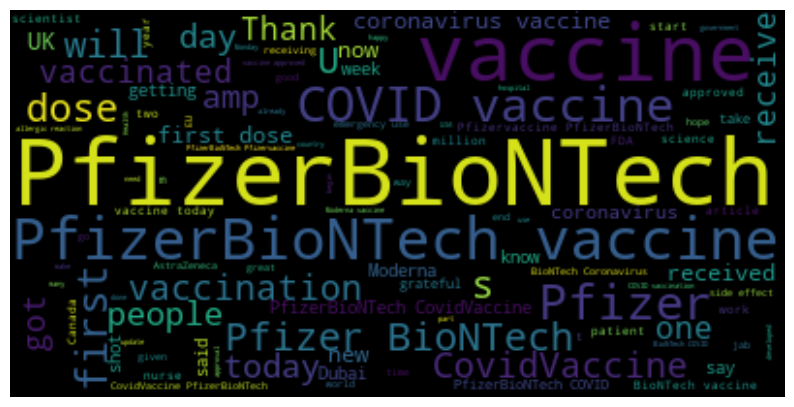

In [10]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

tweet_All = " ".join(review for review in data.text)


fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_All)

# Display the generated image:
ax.imshow(wordcloud_ALL, interpolation='bilinear')

ax.axis('off')


 **MENGHAPUS TATA PUTIH DAN MEMBUAT HURUF KECIL TEKS**

In [11]:
def clean_text(text):
    
    text = str(text).lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    return text
data['text'] = data['text'].apply(lambda x:clean_text(x))

In [12]:
data['text']

0       same folks said daikon paste could treat a cyt...
1       while the world has been on the wrong side of ...
2       coronavirus sputnikv astrazeneca pfizerbiontec...
3       facts are immutable senator even when youre no...
4       explain to me again why we need a vaccine bori...
                              ...                        
2649    happynewyearseve received my first dose of pfi...
2650    this opens the way for regulators worldwide to...
2651    first dose of pfizerbiontech vaccine received ...
2652    💉✅⛔️to vax or not to vax ☪️check out my latest...
2653    this is in contrast to what bbchughpym has jus...
Name: text, Length: 2654, dtype: object

#  **STEMMING DAN LEMATISASI**

In [13]:
df=pd.DataFrame()
df['text']=data['text']
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tokenized'] = df['text'].apply(lambda x: tokenization(x.lower()))
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['No_stopwords'] = df['tokenized'].apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()

def stemming1(text):
    text = [ps.stem(word) for word in text]
    return text

df['stemmed_porter'] = df['No_stopwords'].apply(lambda x: stemming1(x))

from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')
def stemming2(text):
    text = [s_stemmer.stem(word) for word in text]
    return text
df['stemmed_snowball'] = df['No_stopwords'].apply(lambda x: stemming2(x))

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['lemmatized'] = df['No_stopwords'].apply(lambda x: lemmatizer(x))

In [14]:
df

,text,tokenized,No_stopwords,stemmed_porter,stemmed_snowball,lemmatized
0,same folks said daikon paste could treat a cyt...,"[same, folks, said, daikon, paste, could, trea...","[folks, said, daikon, paste, could, treat, cyt...","[folk, said, daikon, past, could, treat, cytok...","[folk, said, daikon, past, could, treat, cytok...","[folk, said, daikon, paste, could, treat, cyto..."
1,while the world has been on the wrong side of ...,"[while, the, world, has, been, on, the, wrong,...","[world, wrong, side, history, year, hopefully,...","[world, wrong, side, histori, year, hope, bigg...","[world, wrong, side, histori, year, hope, bigg...","[world, wrong, side, history, year, hopefully,..."
2,coronavirus sputnikv astrazeneca pfizerbiontec...,"[coronavirus, sputnikv, astrazeneca, pfizerbio...","[coronavirus, sputnikv, astrazeneca, pfizerbio...","[coronaviru, sputnikv, astrazeneca, pfizerbion...","[coronavirus, sputnikv, astrazeneca, pfizerbio...","[coronavirus, sputnikv, astrazeneca, pfizerbio..."
3,facts are immutable senator even when youre no...,"[facts, are, immutable, senator, even, when, y...","[facts, immutable, senator, even, youre, ethic...","[fact, immut, senat, even, your, ethic, sturdi...","[fact, immut, senat, even, your, ethic, sturdi...","[fact, immutable, senator, even, youre, ethica..."
4,explain to me again why we need a vaccine bori...,"[explain, to, me, again, why, we, need, a, vac...","[explain, need, vaccine, borisjohnson, matthan...","[explain, need, vaccin, borisjohnson, matthanc...","[explain, need, vaccin, borisjohnson, matthanc...","[explain, need, vaccine, borisjohnson, matthan..."
...,...,...,...,...,...,...
2649,happynewyearseve received my first dose of pfi...,"[happynewyearseve, received, my, first, dose, ...","[happynewyearseve, received, first, dose, pfiz...","[happynewyearsev, receiv, first, dose, pfizerb...","[happynewyearsev, receiv, first, dose, pfizerb...","[happynewyearseve, received, first, dose, pfiz..."
2650,this opens the way for regulators worldwide to...,"[this, opens, the, way, for, regulators, world...","[opens, way, regulators, worldwide, quickly, a...","[open, way, regul, worldwid, quickli, approv, ...","[open, way, regul, worldwid, quick, approv, im...","[open, way, regulator, worldwide, quickly, app..."
2651,first dose of pfizerbiontech vaccine received ...,"[first, dose, of, pfizerbiontech, vaccine, rec...","[first, dose, pfizerbiontech, vaccine, receive...","[first, dose, pfizerbiontech, vaccin, receiv, ...","[first, dose, pfizerbiontech, vaccin, receiv, ...","[first, dose, pfizerbiontech, vaccine, receive..."
2652,💉✅⛔️to vax or not to vax ☪️check out my latest...,"[, to, vax, or, not, to, vax, check, out, my, ...","[, vax, vax, check, latest, article, published...","[, vax, vax, check, latest, articl, publish, b...","[, vax, vax, check, latest, articl, publish, b...","[, vax, vax, check, latest, article, published..."


In [15]:
data['text']=df['lemmatized']
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,"[folk, said, daikon, paste, could, treat, cyto...",['PfizerBioNTech'],Twitter for Android,0,0,False,Positive
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"[world, wrong, side, history, year, hopefully,...",NaN,Twitter Web App,1,1,False,Negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,"[coronavirus, sputnikv, astrazeneca, pfizerbio...","['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,Positive
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"[fact, immutable, senator, even, youre, ethica...",NaN,Twitter Web App,446,2129,False,Neutral
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,"[explain, need, vaccine, borisjohnson, matthan...","['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,Neutral


# SENTIMENT COUNTS

In [16]:
temp = data.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,Neutral,1113
2,Positive,1100
0,Negative,441


# FUNNEL CHART UNTUK VISUALISASI DISTRIBUSI SENSIMEN YANG LEBIH BAIK


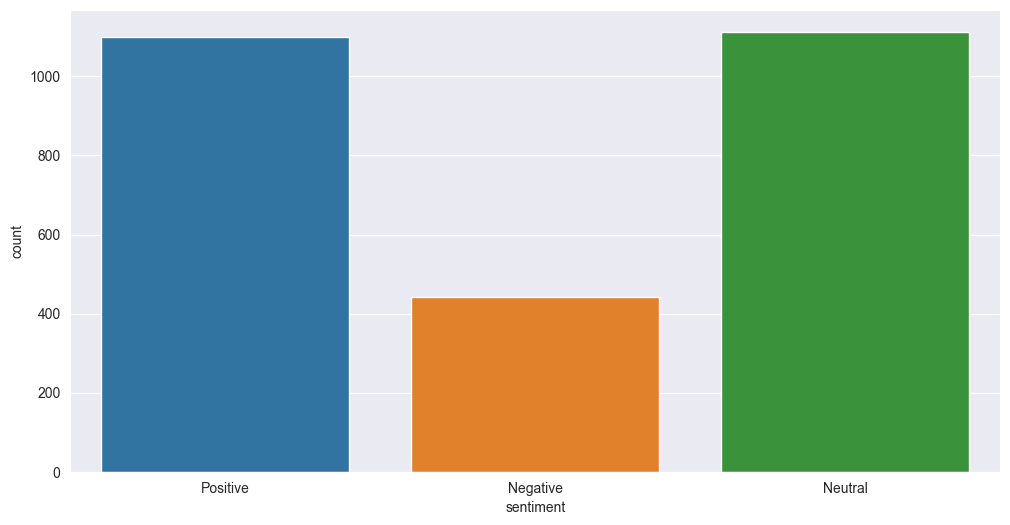

In [17]:

plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=data)
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

# DISTRIBUSI FAVORIT ACCEPTED BERDASARKAN SENTIMEN TWEET DAN APAKAH AKUN TERVERIFIKASI/TIDAK

<AxesSubplot: xlabel='user_verified', ylabel='favorites'>

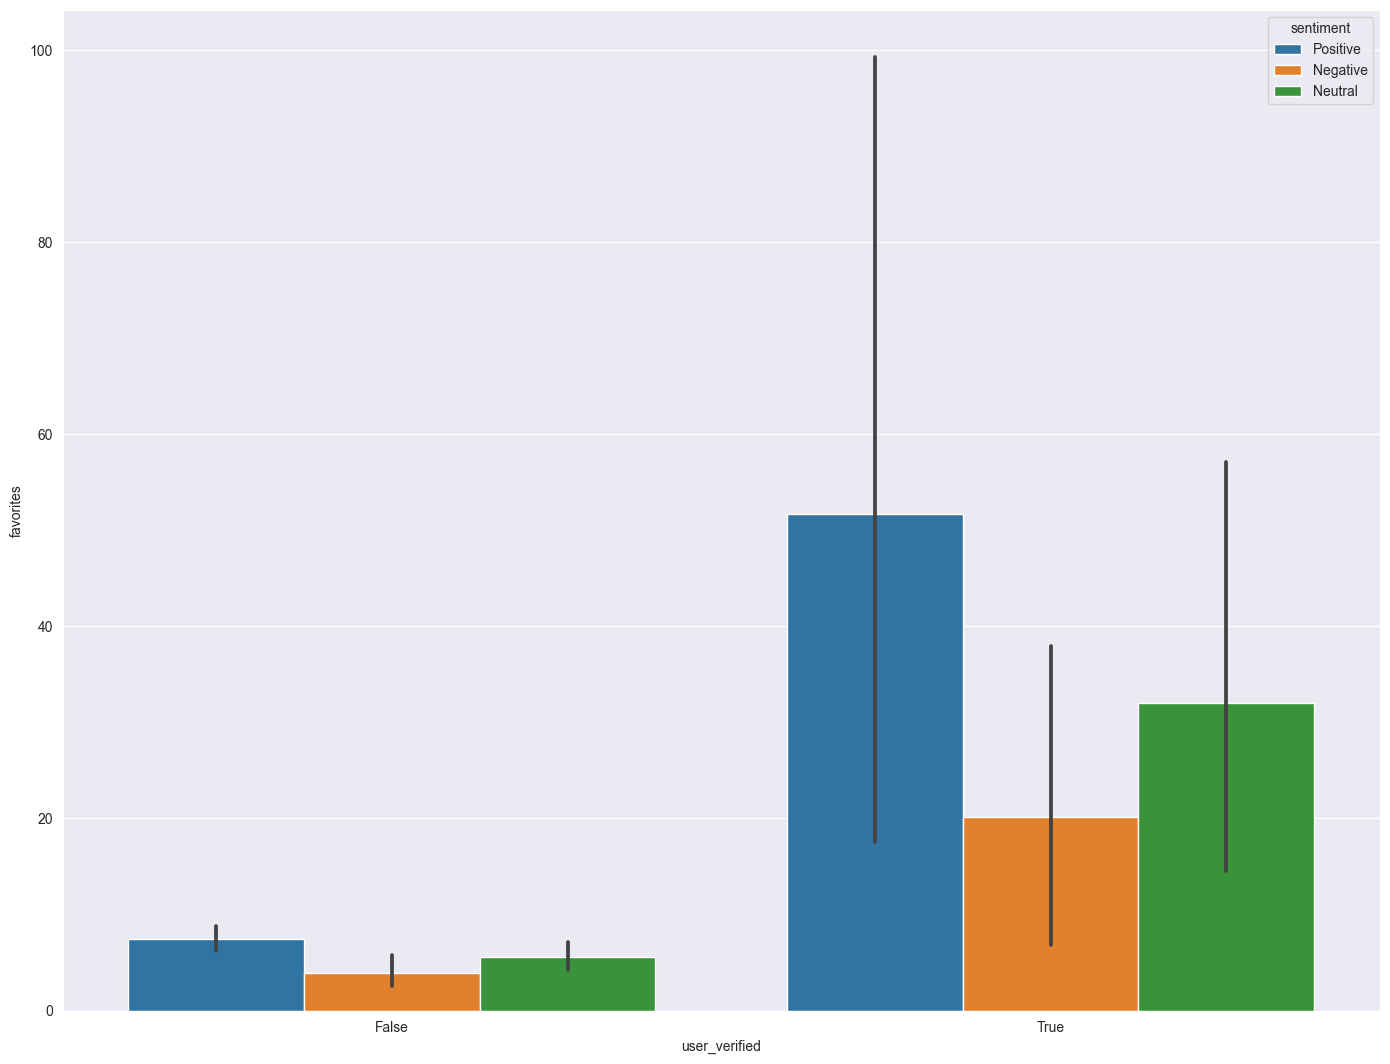

In [18]:
sns.barplot(x="user_verified", y="favorites", hue="sentiment", data=data)


# DISTRIBUSI RETWEET BERDASARKAN SENTIMEN TWEET DAN APAKAH AKUN TERVERIFIKASI/TIDAK

<AxesSubplot: xlabel='user_verified', ylabel='retweets'>

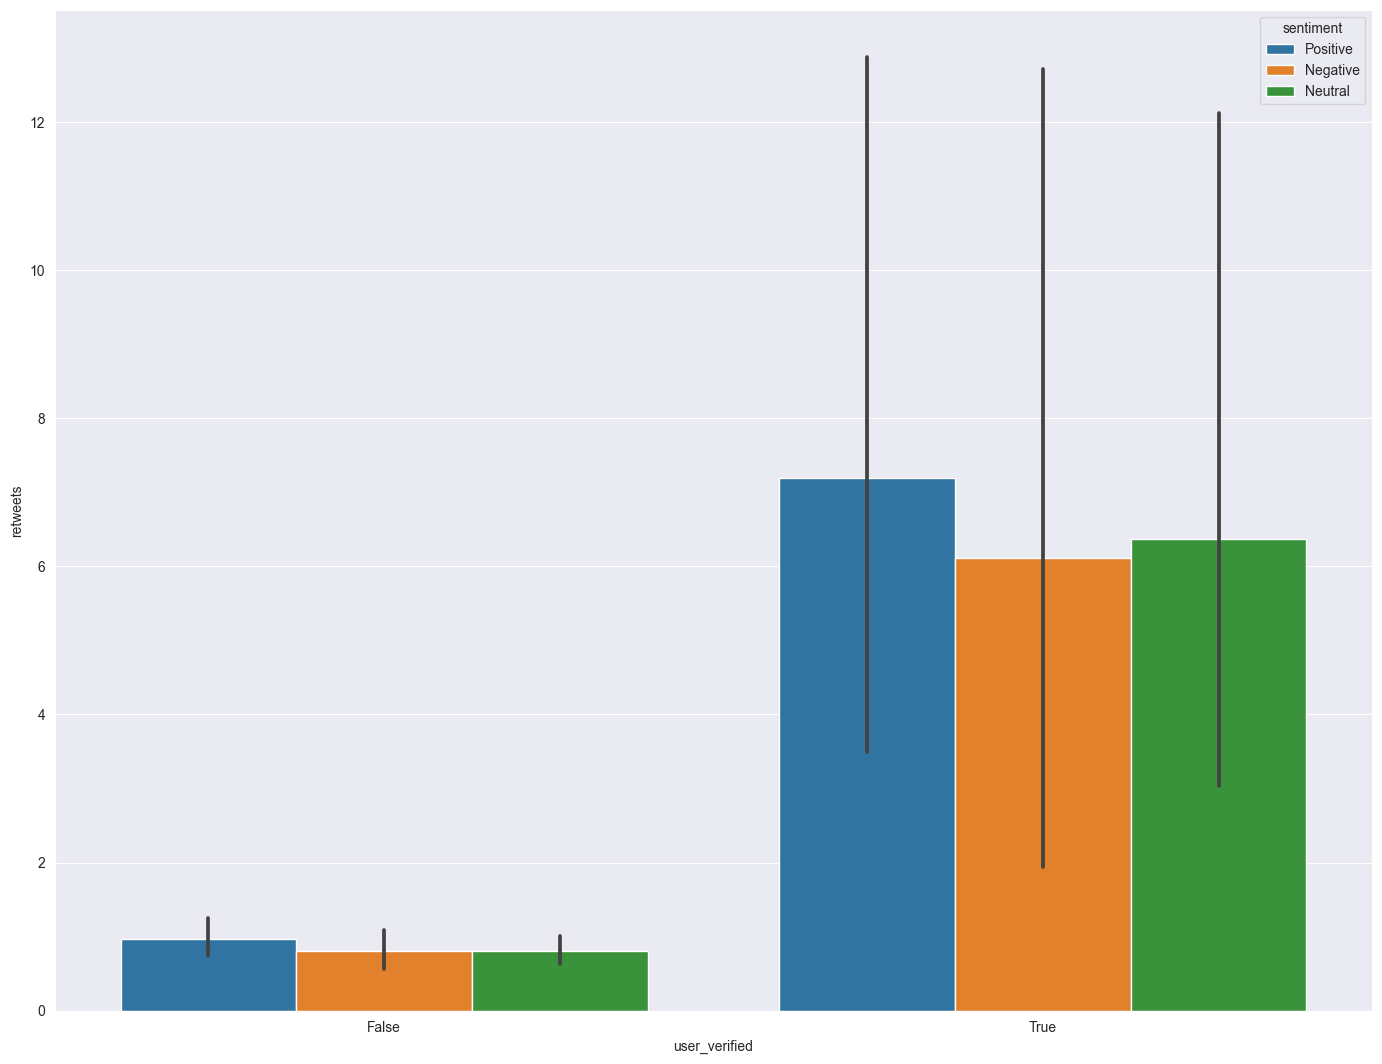

In [19]:
sns.barplot(x="user_verified", y="retweets", hue="sentiment", data=data)

# **30 KATA PALING SERING MUNCUL DI DATA TEKS TWEET**


In [20]:
all_words=[]
for i in range(len(data['text'])):
    a=data['text'][i]
    for i in a:
        all_words.append(i)
all_words=pd.Series(np.array(all_words))

common_words=all_words.value_counts()[:30].rename_axis('Common Words').reset_index(name='count')

fig = px.treemap(common_words, path=['Common Words'], values='count',title='30 Most Common Words In Tweets')
fig.show()

# **30 HASHTAG PALING SERING DIGUNAKAN DALAM DATA TEKS TWEET**

In [21]:
data['hashtags']=data['hashtags'].fillna('[]')
all_hashtags=[]
for i in range(len(data['hashtags'])):
    a=data['hashtags'][i].strip('][').split(', ') 
    for i in a:
        all_hashtags.append(i)
all_hashtags=['No Hashtag' if x=='' else x for x in all_hashtags]       

all_hashtags=pd.Series(np.array(all_hashtags))
print('There are {} instances of tweets in which No Hashtags were used'.format(all_hashtags.value_counts()[1]))

common_hashtags=all_hashtags.value_counts().drop(labels='No Hashtag')[:30].rename_axis('Common Hashtags').reset_index(name='count')
fig = px.treemap(common_hashtags, path=['Common Hashtags'], values='count',title='30 Most Common Hashtags')
fig.show()

There are 673 instances of tweets in which No Hashtags were used


# **SENTIMENT WISE ANALYSIS OF HASHTAGS AND WORDS:**

In [22]:
Positive_tweet = data[data['sentiment']=='Positive'].reset_index()
Negative_tweet = data[data['sentiment']=='Negative'].reset_index()
Neutral_tweet = data[data['sentiment']=='Neutral'].reset_index()

# POSITIVE TWEETS

In [23]:
all_positive_words=[]
all_positive_hashtags=[]
for i in range(len(Positive_tweet['text'])):
    a=Positive_tweet['text'][i]
    b=Positive_tweet['hashtags'][i].strip('][').split(', ')
    for i in a:
        all_positive_words.append(i)
    for i in b:
        all_positive_hashtags.append(i)
all_positive_words=pd.Series(np.array(all_positive_words))
all_positive_hashtags=pd.Series(np.array(all_positive_hashtags))
common_words=all_positive_words.value_counts().drop(labels='')[:70].rename_axis('Common Positive Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Positive Words'], values='count',title='70 Most Common Words In Positive Tweets')
fig.show()
common_hashtags=all_positive_hashtags.value_counts()[:70].drop(labels='').rename_axis('Common Positive Hashtags').reset_index(name='count')
fig = px.treemap(common_hashtags, path=['Common Positive Hashtags'], values='count',title='70 Most Common Hashtags In Positive Tweets')
fig.show()

# NEGATIVE TWEETS

In [24]:
all_negative_words=[]
all_negative_hashtags=[]
for i in range(len(Negative_tweet['text'])):
    a=Negative_tweet['text'][i]
    b=Negative_tweet['hashtags'][i].strip('][').split(', ')
    for i in a:
        all_negative_words.append(i)
    for i in b:
        all_negative_hashtags.append(i)
all_negative_words=pd.Series(np.array(all_negative_words))
all_negative_hashtags=pd.Series(np.array(all_negative_hashtags))
common_words=all_negative_words.value_counts().drop(labels='')[:70].rename_axis('Common Negative Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Negative Words'], values='count',title='70 Most Common Words In Negative Tweets')
fig.show()
common_hashtags=all_negative_hashtags.value_counts()[:70].drop(labels='').rename_axis('Common Negative Hashtags').reset_index(name='count')
fig = px.treemap(common_hashtags, path=['Common Negative Hashtags'], values='count',title='70 Most Common Hashtags In Negative Tweets')
fig.show()

# NEUTRAL TWEETS

In [25]:
all_neutral_words=[]
all_neutral_hashtags=[]
for i in range(len(Neutral_tweet['text'])):
    a=Neutral_tweet['text'][i]
    b=Neutral_tweet['hashtags'][i].strip('][').split(', ')
    for i in a:
        all_neutral_words.append(i)
    for i in b:
        all_neutral_hashtags.append(i)
all_neutral_words=pd.Series(np.array(all_neutral_words))
all_neutral_hashtags=pd.Series(np.array(all_neutral_hashtags))
common_words=all_neutral_words.value_counts().drop(labels='')[:70].rename_axis('Common Neutral Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Neutral Words'], values='count',title='70 Most Common Words In Neutral Tweets')
fig.show()
common_hashtags=all_neutral_hashtags.value_counts()[:70].drop(labels='').rename_axis('Common Neutral Hashtags').reset_index(name='count')
fig = px.treemap(common_hashtags, path=['Common Neutral Hashtags'], values='count',title='70 Most Common Hashtags In Neutral Tweets')
fig.show()

In [26]:
common=set(all_positive_words).intersection(set(all_negative_words)).intersection(set(all_neutral_words))
common_list=list(common)

common_words=all_negative_words.value_counts().drop(labels=common_list)[:30].rename_axis('Common Negative Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Negative Words'], values='count',title='Top 30 Unique Words In Negative Tweets')
fig.show()
common_words=all_positive_words.value_counts().drop(labels=common_list)[:30].rename_axis('Common Positive Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Positive Words'], values='count',title='Top 30 Unique Words In Positive Tweets')
fig.show()
common_words=all_neutral_words.value_counts().drop(labels=common_list)[:30].rename_axis('Common Neutral Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Neutral Words'], values='count',title='Top 30 Unique Words In Neutral Tweets')
fig.show()

In [27]:
data_verified=data[(data['user_verified']==True)].reset_index()
data_not_verified=data[(data['user_verified']==False)].reset_index()

# **HASHTAGS**

In [28]:
all_hashtags=[]
for i in range(len(data_verified['hashtags'])):
    a=data_verified['hashtags'][i].strip('][').split(', ') 
    for i in a:
        all_hashtags.append(i)
all_hashtags=['No Hashtag' if x=='' else x for x in all_hashtags]       

all_hashtags=pd.Series(np.array(all_hashtags))
common_hashtags=all_hashtags.value_counts()[:30].rename_axis('Common Hashtags').reset_index(name='count')
fig = px.treemap(common_hashtags, path=['Common Hashtags'], values='count',title='30 Most Common Hashtags by VERIFIED ACCOUNTS')
fig.show()

# **SENTIMENT WISE WORD FREQUENCY**

In [29]:


Positive_tweet = data_verified[data_verified['sentiment']=='Positive'].reset_index()
Negative_tweet = data_verified[data_verified['sentiment']=='Negative'].reset_index()
Neutral_tweet = data_verified[data_verified['sentiment']=='Neutral'].reset_index()
all_positive_words=[]

for i in range(len(Positive_tweet['text'])):
    a=Positive_tweet['text'][i]
    
    for i in a:
        all_positive_words.append(i)
    
all_positive_words=pd.Series(np.array(all_positive_words))
all_neutral_words=[]

for i in range(len(Neutral_tweet['text'])):
    a=Neutral_tweet['text'][i]
    
    for i in a:
        all_neutral_words.append(i)
    
all_neutral_words=pd.Series(np.array(all_neutral_words))
all_negative_words=[]

for i in range(len(Negative_tweet['text'])):
    a=Negative_tweet['text'][i]
   
    for i in a:
        all_negative_words.append(i)
    
all_negative_words=pd.Series(np.array(all_negative_words))
common=set(all_positive_words).intersection(set(all_negative_words)).intersection(set(all_neutral_words))
common_list=list(common)

common_words=all_negative_words.value_counts().drop(labels=common_list)[:30].rename_axis('Common Negative Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Negative Words'], values='count',title='30 Most Common Unique Negative Words by VERIFIED ACCOUNTS')
fig.show()
common_words=all_positive_words.value_counts().drop(labels=common_list)[:30].rename_axis('Common Positive Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Positive Words'], values='count',title='30 Most Common Unique Positive Words by VERIFIED ACCOUNTS')
fig.show()
common_words=all_neutral_words.value_counts().drop(labels=common_list)[:30].rename_axis('Common Neutral Words').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Neutral Words'], values='count',title='30 Most Common Unique Neutral Words by VERIFIED ACCOUNTS')
fig.show()

#  TWEET SENTIMENT BASED ANALYSIS OF LOCATION

In [30]:
data['user_location'] = data['user_location'].fillna('NaN')
Positive_tweet = data[data['sentiment']=='Positive'].reset_index()
Negative_tweet = data[data['sentiment']=='Negative'].reset_index()
Neutral_tweet = data[data['sentiment']=='Neutral'].reset_index()
pos_location=Positive_tweet['user_location']
neg_location=Negative_tweet['user_location']
neu_location=Neutral_tweet['user_location']

common=set(pos_location).intersection(set(neg_location)).intersection(set(neu_location))
common_list=list(common)

common_words=neg_location.value_counts().drop(labels=common_list)[:10].rename_axis('Common Negative Locations').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Negative Locations'], values='count',title='10 Top Unique Negative Tweets Locations')
fig.show()
common_words=pos_location.value_counts().drop(labels=common_list)[:10].rename_axis('Common Positive Locations').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Positive Locations'], values='count',title='10 Top Unique Positive Tweets Locations')
fig.show()
common_words=neu_location.value_counts().drop(labels=common_list)[:10].rename_axis('Common Neutral Locations').reset_index(name='count')
fig = px.treemap(common_words, path=['Common Neutral Locations'], values='count',title='10 Top Unique Neutral Tweets Locations')
fig.show()

# ANALISIS SENTIMEN TWEET BERDASARKAN WAKTU:

<Figure size 4000x1000 with 0 Axes>

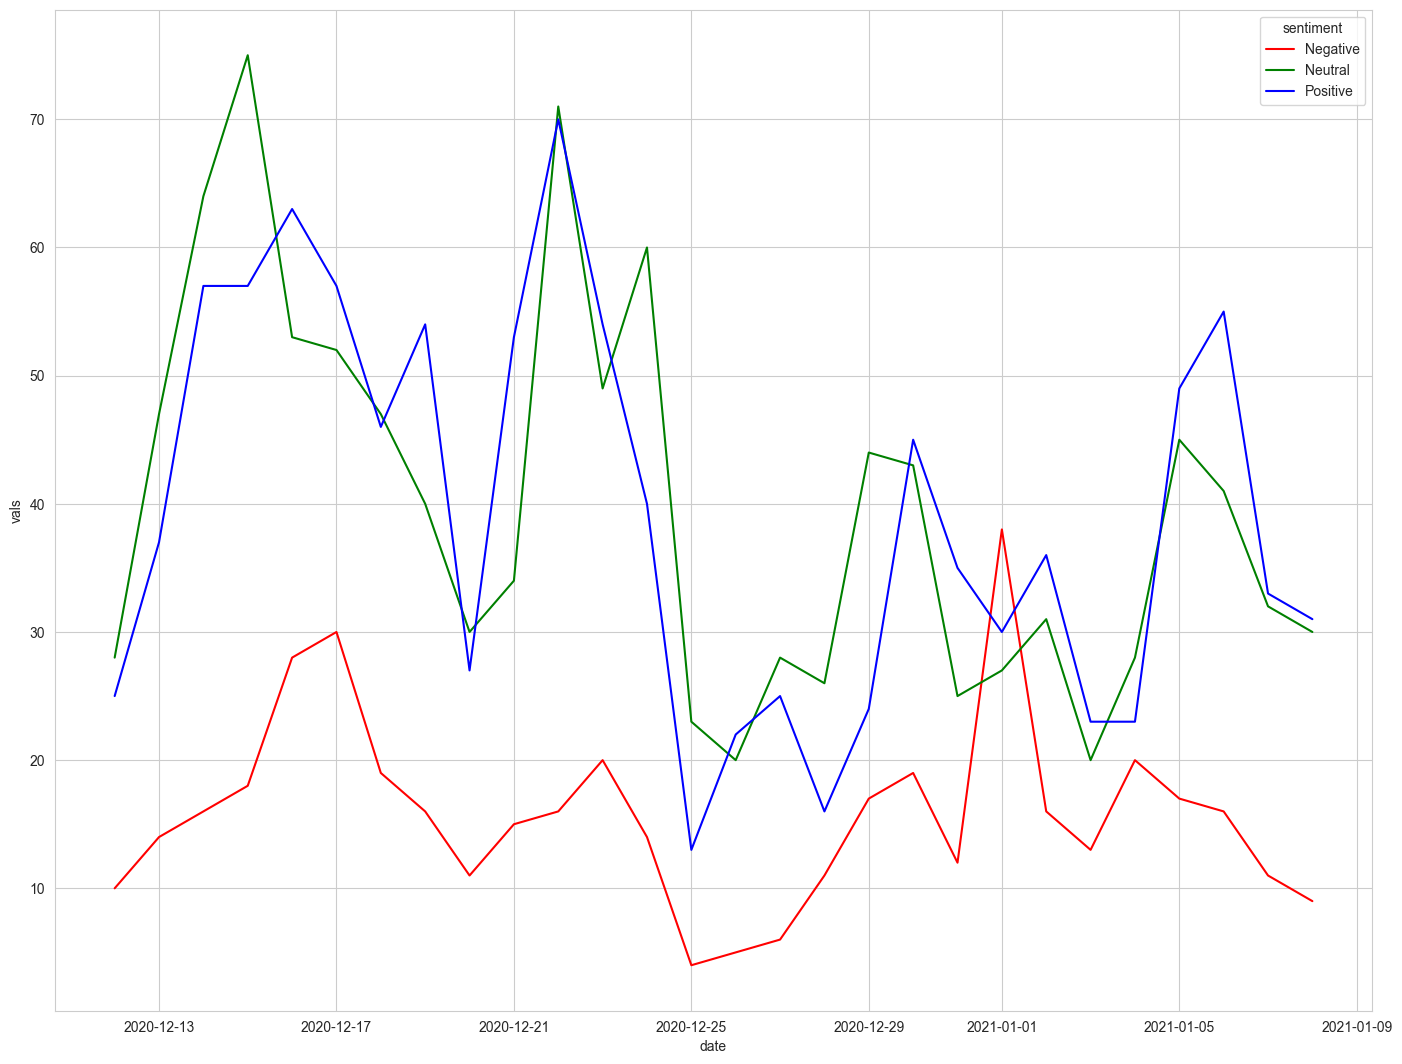

<Figure size 4000x1000 with 0 Axes>

In [31]:
data["date"] = pd.to_datetime(data.date) 
timeline = data.resample('D', on='date')["sentiment"].value_counts().unstack(1)

timeline.reset_index(inplace=True)

timeline = timeline.melt("date", var_name='sentiment',  value_name='vals')

sns.set_style("whitegrid")
sns.lineplot(x="date", y="vals", hue="sentiment", data=timeline, palette=["r", "g","b"])
plt.figure(figsize=(40,10))